# Example of an analysis 

First read some libraries needed. 


In [1]:
import numpy as np
import scipy.integrate
import scipy.optimize
import scipy.linalg

import matplotlib.pyplot as plt
import seaborn as sns
import sympy as symp 

# define some colors. This is a comment line. 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']


%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

### Definfing the right hand side function
This can be changed, or another can be defined later on. The example uses:

$$\dot{x}=y\left( 1-x^2\right)$$
$$\dot{y}=-x\left(1-y^2\right)$$
Example of using latex. 


In [15]:
x,y, t=symp.symbols('x y t')

f=y*(1-x**2)
g=-x*(1-y**2)
J = symp.Function('J')(x,y)

In [16]:
rhs=symp.Matrix([f,g])
eqpnts=symp.solve(rhs)
J=rhs.jacobian([x,y])
eqpnts

[{x: -1, y: -1}, {x: -1, y: 1}, {x: 0, y: 0}, {x: 1, y: -1}, {x: 1, y: 1}]


Nullclines: 

$\dot{x}=0$ at $y=0$ or $x=\pm 1$.

$\dot{y}=0$ at $x=0$ or $y=\pm 1$.

Fixed point $(0,0)$, $(\pm 1,\pm 1)$

In [17]:
J

Matrix([
[  -2*x*y, 1 - x**2],
[y**2 - 1,    2*x*y]])

In [18]:
def rhs(xy,t):
    xv,yv=xy
    rhs_symp=symp.lambdify((x,y),[f,g])
    return np.array(rhs_symp(xv,yv))



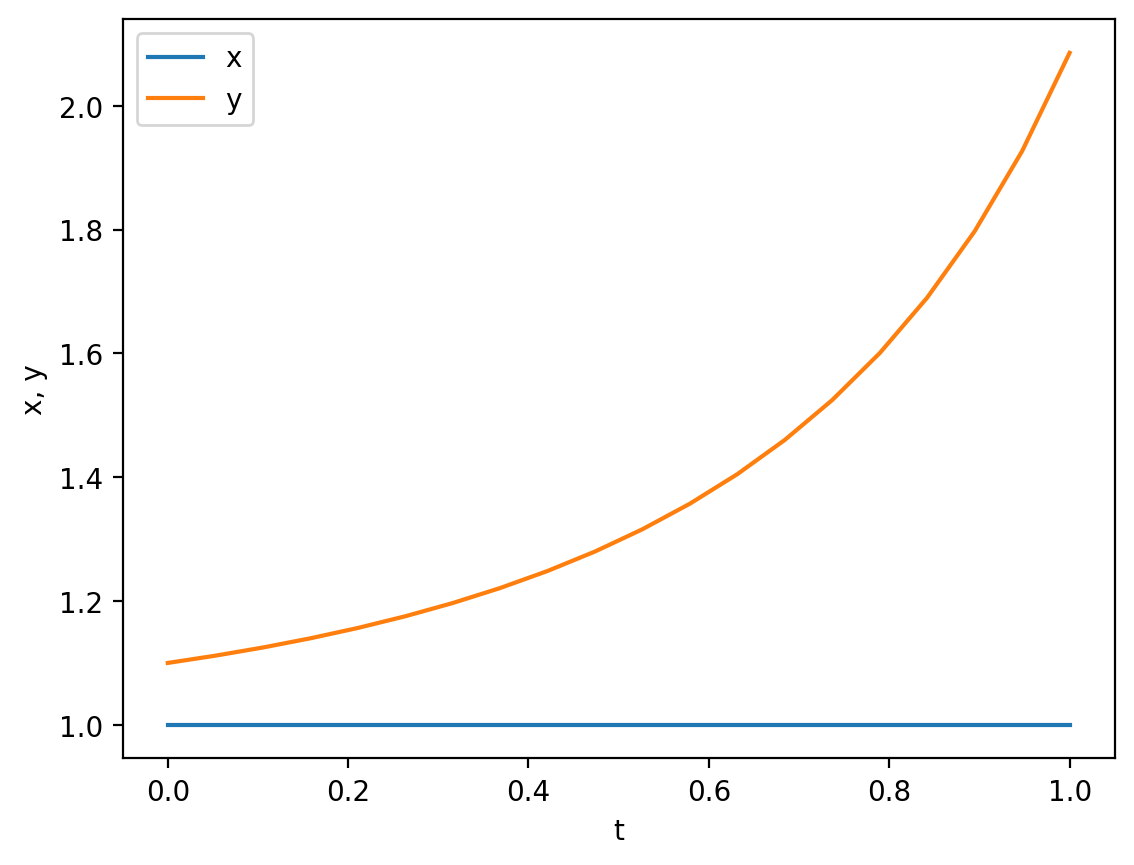

In [19]:

# Initial condition
ab0 = np.array([1, 1.1])


# Solve
t = np.linspace(0, 1, 20)
xy = scipy.integrate.odeint(rhs, ab0, t)


# Plot
plt.plot(t,xy)
plt.xlabel('t')
plt.ylabel('x, y')
plt.legend(('x', 'y'));

## A routine plotting the vectors. 

In [7]:
def plot_flow_field(ax, f, u_range, v_range, args=(), n_grid=100):
    """
    Plots the flow field with line thickness proportional to speed.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    u_range : array_like, shape (2,)
        Range of values for u-axis.
    v_range : array_like, shape (2,)
        Range of values for v-axis.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    # Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

    # Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, 
                  density=1, color='thistle')

    return ax

## The example.

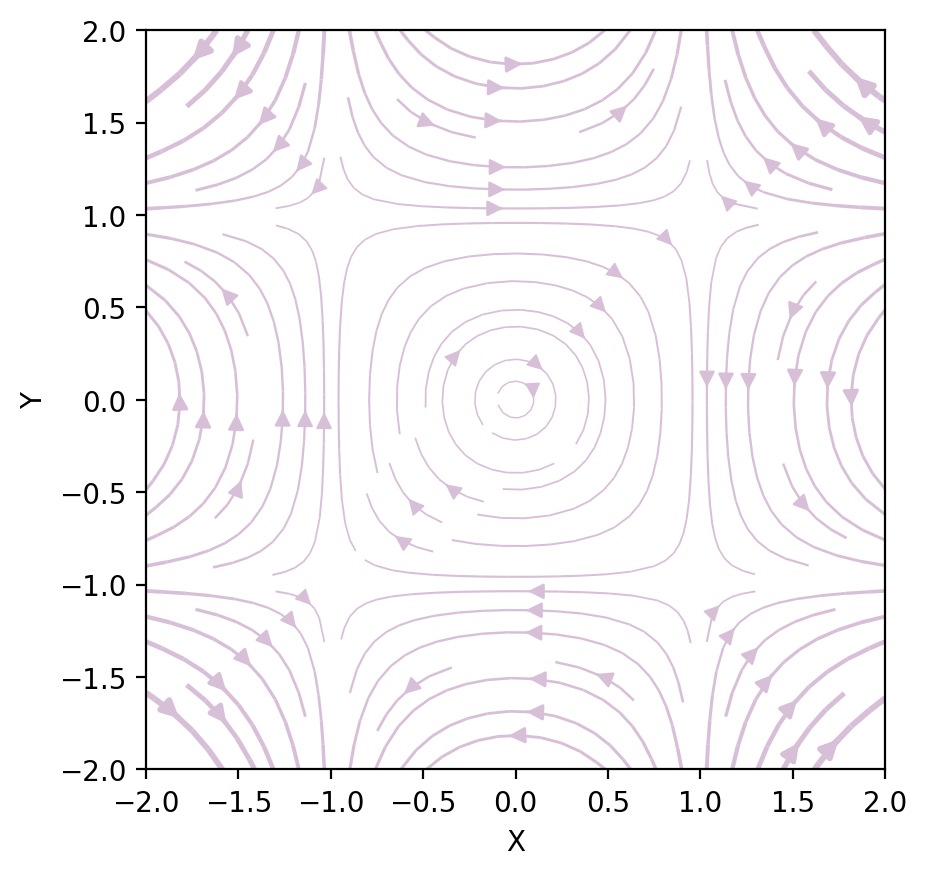

In [8]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax = plot_flow_field(ax, rhs, (-2, 2), (-2, 2))

## Nullclines



In [9]:

def plot_nullcl(ax, f, u_range, v_range, args=(), n_grid=100):
    """
    Plots the flow field with line thickness proportional to speed.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    u_range : array_like, shape (2,)
        Range of values for u-axis.
    v_range : array_like, shape (2,)
        Range of values for v-axis.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    # Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

    # Make stream plot
    cs1=ax.contour(uu, vv, u_vel, [0],
                 colors=('r'))
    cs2=ax.contour(uu, vv, v_vel, [0],
                 colors=('b'))
    return ax



## The example

Remember nullclines: 

$\dot{x}=0$ at $y=0$ or $x=\pm 1$.

$\dot{y}=0$ at $x=0$ or $y=\pm 1$.

Fixed point $(0,0)$, $(\pm 1,\pm 1)$

<Axes: xlabel='X', ylabel='Y'>

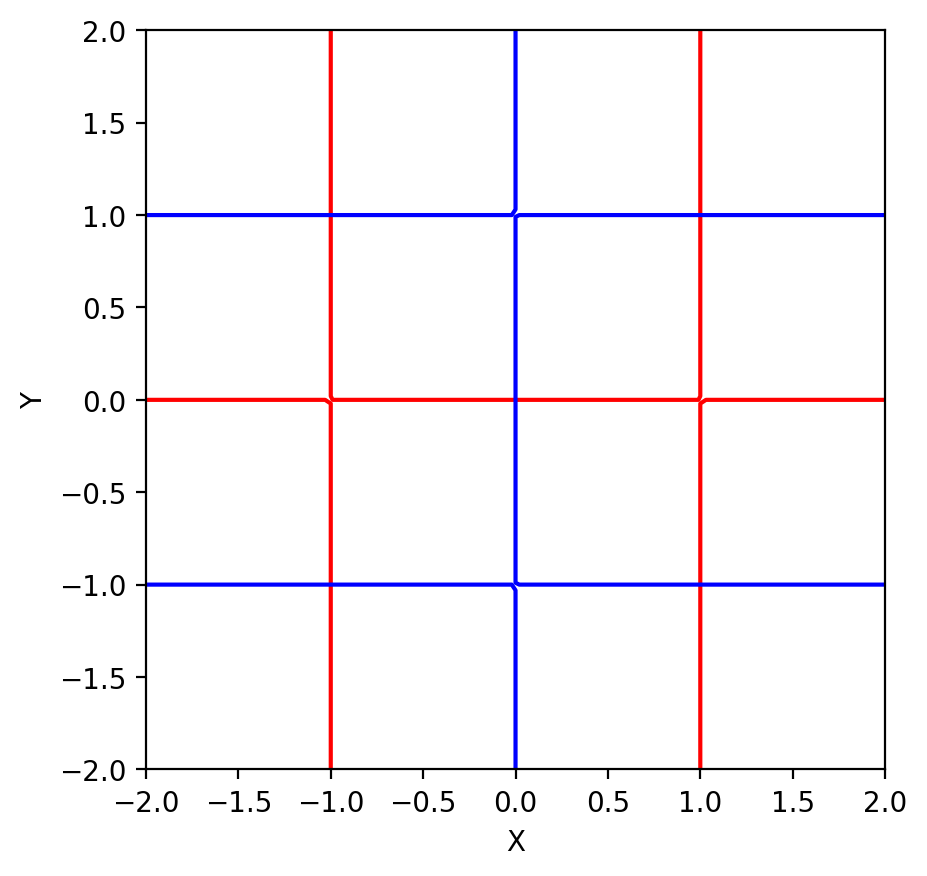

In [10]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plot_nullcl(ax, rhs, [-2, 2], [-2, 2], args=(), n_grid=100)
#ax = plot_null_clines_toggle(ax, [-2, 2], [-2, 2])

## Fixed points

$$\dot{x}=y\left( 1-x^2\right)$$
$$\dot{y}=-x\left(1-y^2\right)$$

Fixed points at  $(0,0)$, $(\pm 1,\pm 1)$
 
 Stability: 
 
 Jacobian
 
 $$J(x,y)=\left[ \begin{array}{cc}-2xy & 1-x^2\\ -(1-y^2)& 2yx \end{array}\right] $$
 
(0,0): $J=\left[ \begin{array}{cc}0 & 1\\ -1& 0 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm i$ center. 

(1, 1): $J=\left[ \begin{array}{cc}-2 & 0\\ 0 & 2 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm 2$ saddle. Eigenvectors: $\lambda=2, v_1=\left[\begin{array}{c} 0 \\ 1\end{array}\right]$, $\lambda=-2, v_1=\left[\begin{array}{c} 1 \\ 0\end{array}\right]$ 



(1, -1): $J=\left[ \begin{array}{cc}2 & 0\\ 0 & -2 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm 2$ saddle. Eigenvectors: $\lambda=2, v_1=\left[\begin{array}{c} 1 \\ 0\end{array}\right]$, $\lambda=-2, v_1=\left[\begin{array}{c} 0 \\ 1\end{array}\right]$ 

(-1, 1): $J=\left[ \begin{array}{cc}2 & 1\\ 0 & -2 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm 2$ saddle.

(-1, -1): $J=\left[ \begin{array}{cc}-2 & 1\\ 0 & 2 \end{array}\right] $ $\Rightarrow$ $\lambda=\pm 2$ saddle.

In [11]:
def plot_fixed_points(ax, fps, color='black'):
    """Add fixed points to plot."""
    x,y=fps
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=20)
    return ax

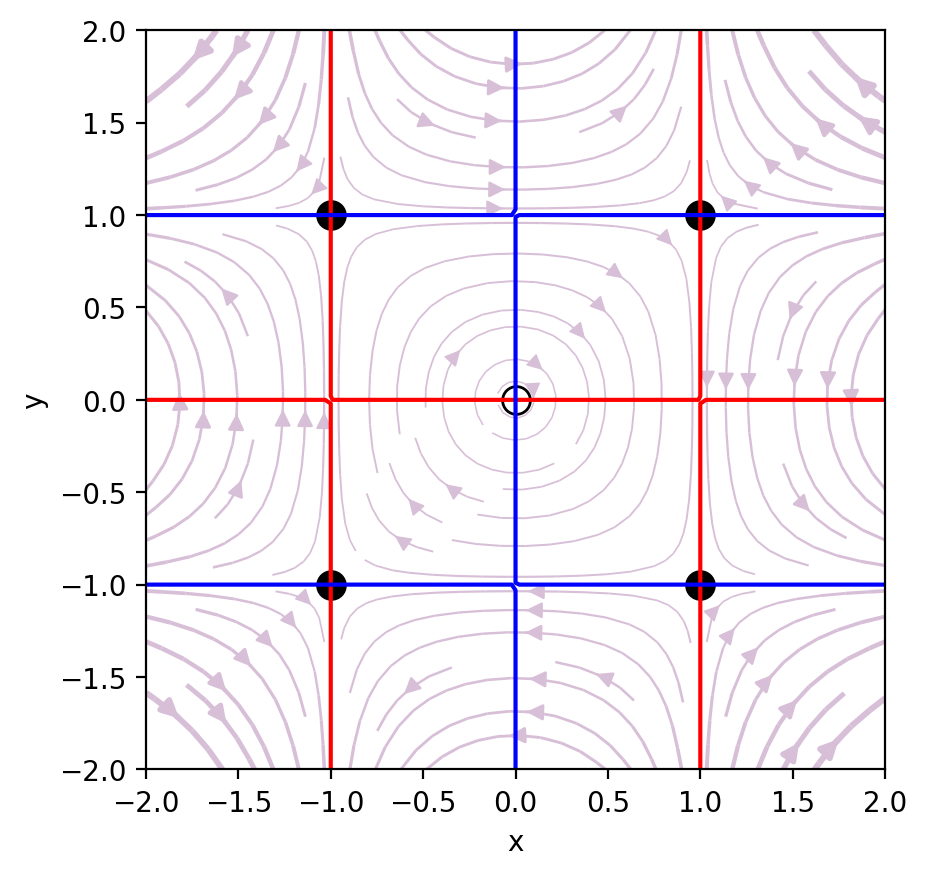

In [12]:
# Set up the figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

# Build the plot
a_range = [-2, 2]
b_range = [-2, 2]
ax = plot_flow_field(ax, rhs, a_range, b_range)
ax = plot_fixed_points(ax, np.array([0,0]),color='white')
ax = plot_fixed_points(ax, np.array([[-1,-1,1,1],[1,-1,1,-1]]),color='black')
ax = plot_nullcl(ax, rhs, [-2, 2], [-2, 2], args=(), n_grid=100)
#ax = plot_fixed_points_toggle(ax, beta, gamma, n)

In [13]:
def plot_traj(ax, f, y0, t, args=(), color='black', lw=2):
    """
    Plots a trajectory on a phase portrait.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    y0 : array_like, shape (2,)
        Initial condition.
    t : array_like
        Time points for trajectory.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    y = scipy.integrate.odeint(f, y0, t, args=args)
    ax.plot(*y.transpose(), color=color, lw=lw)
    return ax

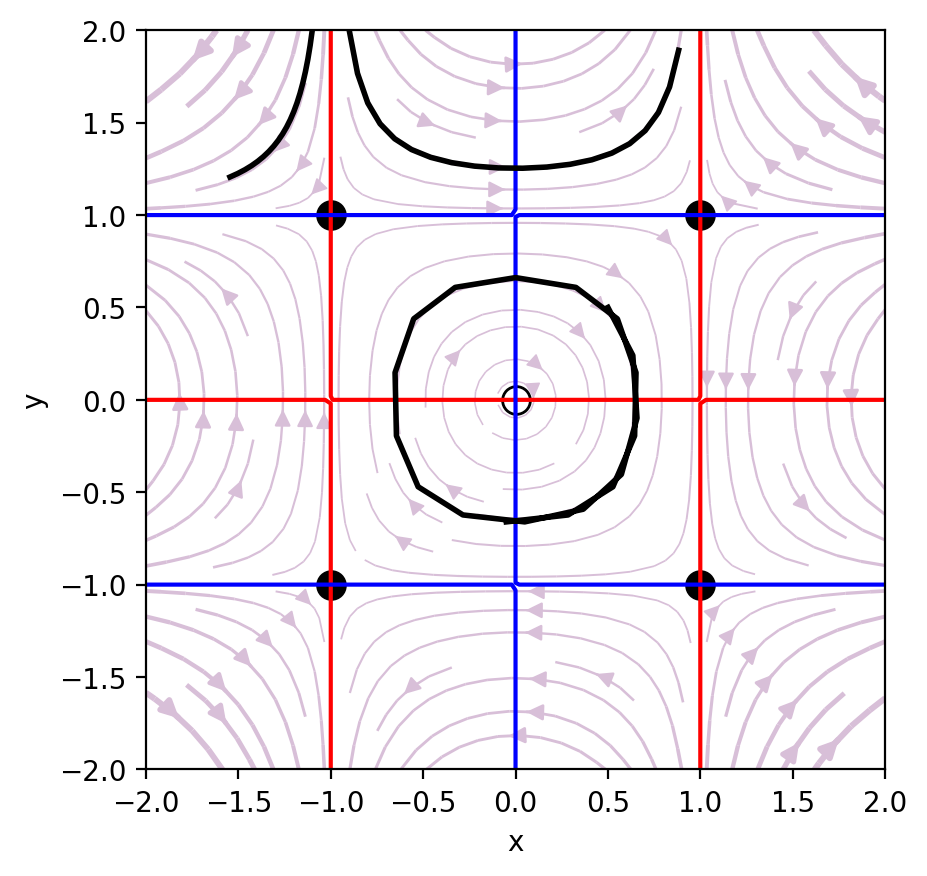

In [14]:
ax = plot_traj(ax, rhs, np.array([0.5, 0.5]), np.linspace(0,10,20))
ax = plot_traj(ax, rhs, np.array([-1.1, 2]), np.linspace(0,0.5,20) )
ax = plot_traj(ax, rhs, np.array([-0.9, 2]), np.linspace(0,2.,20) )
#ax = plot_traj(ax, rhs, np.array([0.5, 0.5]), np.linspace(0,-3,20) )
fig